In [ ]:
"""
BF550 Project 1
Code to reproduce figures from Zamora-Camacho et al. Paper
Bergmann's rule Rules body size in an ectotherm: Heat conservation in a Lizard along A 2200-metre Elevational gradient
Kyrah Kotary
kkotary@bu.edu
"""

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
excel_file = pd.ExcelFile('bergmanns_rule.xls') 

In [19]:
print(excel_file.sheet_names) 

['2012']


In [21]:
df = excel_file.parse('2012') 
print(df.columns) #what information is in the excel table?

Index(['NumCol', 'Altitude', 'Altitude 2', 'Elevation Belt', 'Sex', 'Tb (ºC)',
       'MasCapt (g)', 'SVL (mm)', 'FrontLeg', 'HindLeg', 'HeadWidth',
       'HeadLenth', 'Head Height', 'Throat L', 'Throat A', 'Throat B',
       'Back L', 'Back A', 'Back B', 'Gravid', 'Heating rate', 'Cooling rate',
       'Inertia lapsus'],
      dtype='object')


In [47]:
altitudes = df['Altitude'].unique()
print(altitudes) #which altitudes were body masses measured at?

[ 300  700 1200 1700 2200 2500]


In [227]:
#compute values needed for plot and calculation of confidence intervals
bm_means = [] #mean body mass at each altitude
bm_counts = [] #number of body mass measurements at each altitude
bm_std = [] #standard deviations
bm_se = [] #standard errors 
lci = [] #lower limit of the 95% confidence interval
uci = [] #upper limit of the 95% confidence interval
z = 1.96 #z score for 95% confidence interval
for i in altitudes:
    mask = df["Altitude"] == i
    altitude = df[mask]
    bm = altitude["MasCapt (g)"]
    bm_means.append(bm.mean())
    bm_counts.append(bm.count())
    bm_std.append(bm.std())
    se = bm.std()/np.sqrt(bm.count())
    #bm_se.append(bm.std()/np.sqrt(bm.count()))
    bm_se.append(se)
    lci.append(bm.mean() - z*se)
    uci.append(bm.mean() + z*se)

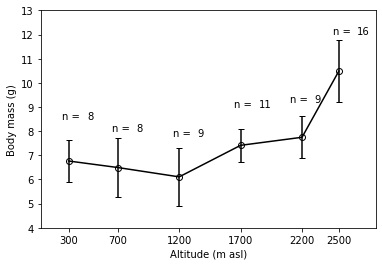

In [226]:
#plot the points
x = np.array(altitudes)
y = np.array(bm_means) 
plt.plot(altitudes, bm_means, 'o', color='black', fillstyle='none')
plt.xlabel('Altitude (m asl)')
plt.ylabel('Body mass (g)')
plt.xlim(75, 2800)
xlabels = ["300", "700", "1200", "1700", "2200", "2500"]
plt.xticks(altitudes, labels)
plt.ylim(4, 13);

#error bars for 95% confidence interval
ymin = np.array([0,1,2,3])
ymax = np.array([3,4,5,6])
ytop = uci-y
ybot = y-lci
plt.errorbar(x, y, yerr=(ytop, ybot), color='black', capsize=3);

#label the points with sample sizes
label = "n ="
label_pos = [(250, 8.5), (650, 8), (1150, 7.8), (1650, 9), (2100, 9.2), (2450, 12)]
for pos in label_pos:
    plt.annotate(label, pos)
nlabel_pos = [(450, 8.5), (850, 8), (1350, 7.8), (1850, 9), (2300, 9.2), (2650, 12)]
for i in range(len(bm_counts)):
    plt.annotate(bm_counts[i], nlabel_pos[i])

In [231]:
import statsmodels.api as sm

In [232]:
df = df.dropna()
cr = df['Cooling rate']
hr = df['Heating rate']
bm = df['MasCapt (g)']

In [233]:
#define the variables 
x = bm
y1 = abs(cr)
y2 = hr
  
#add the constant term 
x = sm.add_constant(x) 
  
#performing the regression and fit the model 
result1 = sm.OLS(y1, x).fit()
result2 = sm.OLS(y2, x).fit()
  
#summary table 
print(result1.summary()) 
print(result2.summary()) 

                            OLS Regression Results                            
Dep. Variable:           Cooling rate   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     6.762
Date:                Wed, 09 Dec 2020   Prob (F-statistic):             0.0247
Time:                        11:00:02   Log-Likelihood:                 11.181
No. Observations:                  13   AIC:                            -18.36
Df Residuals:                      11   BIC:                            -17.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7405      0.106      7.013      

C:\Users\kyrah\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\kyrah\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


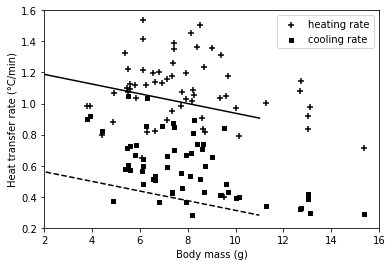

In [235]:
#plot the original values 
df = excel_file.parse('2012')
cr = df['Cooling rate']
hr = df['Heating rate']
bm = df['MasCapt (g)']
x = bm 
y1 = abs(cr)
y2 = hr
plt.scatter(x, y2, marker='+', color='black', label='heating rate')
plt.scatter(x, y1, marker='s', s=10, color='black', label='cooling rate')
plt.xlim(2, 16)
plt.ylim(0.2, 1.6)
plt.xlabel('Body mass (g)')
plt.ylabel('Heat transfer rate (\N{DEGREE SIGN}C/min)')
plt.legend()
 
#find the maximum and minimum values of x to get the range of data 
max_x = x.max() 
min_x = x.min() 
  
#range of values for plotting the regression line 
x = np.arange(min_x, max_x, 1) 
  
#the substituted equation 
y1 = -0.0311  * x + 0.7405
y2 = -0.0313 * x + 1.3687
  
#plott the regression line 
plt.plot(y1, 'r', color='black', linestyle='--')
plt.plot(y2, 'r', color='black')
plt.show()